**Column Description**

1. **Year :** Year of the TB case registration
2. **Quarter :** Quarter of the TB case registration (1-4)
3. **LGA :** Local Government Area where the TB case was registered
4. **Sex :** Male or Female
5. **0-4 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 0-4 years
6. **5-14 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 5-14 years
7. **15–24 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 15-24 years
8. **25–34 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 25-34 years
9. **35–44 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 35-44 years
10. **45–54 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 45-54 years
11. **55–64 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 55-64 years
12. **>= 65 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged >65 years
13. **Total :** Total TB Cases (Aggregated)




In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
block2c_2022 = pd.read_csv('/content/block2c_2022.csv')
# remove index column
block2c_2022.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
block2c_2022.head()

,Year,Quarter,LGA,Sex,0-4,5-14,15-24,25-34,35-44,45-54,55-64,>=65,Total
0,2022,1,BIRIN GWARI,Male,0.0,0.0,7,16,18,11,11.0,15.0,78
1,2022,1,BIRIN GWARI,Female,0.0,0.0,2,14,8,9,6.0,3.0,42
2,2022,2,BIRIN GWARI,Male,0.0,0.0,3,13,3,10,22.0,14.0,65
3,2022,2,BIRIN GWARI,Female,0.0,0.0,1,6,7,16,8.0,6.0,44
4,2022,3,BIRIN GWARI,Male,0.0,0.0,5,8,6,8,8.0,15.0,50


In [ ]:
block2c_2022.shape

(184, 13)

In [ ]:
block2c_2022.columns

Index(['Year', 'Quarter', 'LGA', 'Sex', '0-4', '5-14', '15-24', '25-34',
       '35-44', '45-54', '55-64', '>=65', 'Total'],
      dtype='object')

In [ ]:
block2c_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     184 non-null    int64  
 1   Quarter  184 non-null    int64  
 2   LGA      184 non-null    object 
 3   Sex      184 non-null    object 
 4   0-4      181 non-null    float64
 5   5-14     182 non-null    float64
 6   15-24    184 non-null    int64  
 7   25-34    184 non-null    int64  
 8   35-44    184 non-null    int64  
 9   45-54    184 non-null    int64  
 10  55-64    182 non-null    float64
 11  >=65     182 non-null    float64
 12  Total    184 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 18.8+ KB


### Handling Null Values

In [ ]:
# check for null values
block2c_2022.isnull().sum()

Year       0
Quarter    0
LGA        0
Sex        0
0-4        3
5-14       2
15-24      0
25-34      0
35-44      0
45-54      0
55-64      2
>=65       2
Total      0
dtype: int64

In [ ]:
# locate NULl values to see if they are from same attribute or not
block2c_2022.loc[ \
    (block2c_2022['0-4'].isnull()) | \
    (block2c_2022['5-14'].isnull()) | \
    (block2c_2022['55-64'].isnull()) | \
    (block2c_2022['>=65'].isnull()) \
]

,Year,Quarter,LGA,Sex,0-4,5-14,15-24,25-34,35-44,45-54,55-64,>=65,Total
57,2022,1,KACHIA,Female,NaN,NaN,13,43,38,32,20.0,8.0,154
97,2022,1,KAURA,Female,0.0,0.0,0,1,1,0,NaN,0.0,2
118,2022,4,KUBAU,Male,2.0,3.0,13,10,10,6,3.0,NaN,47
123,2022,2,KUDAN,Female,1.0,1.0,2,4,6,3,NaN,1.0,18
125,2022,3,KUDAN,Female,4.0,0.0,5,3,7,5,2.0,NaN,26
166,2022,4,SOBA,Male,NaN,NaN,8,16,20,9,5.0,2.0,60
167,2022,4,SOBA,Female,NaN,0.0,12,22,14,8,1.0,1.0,58


In [ ]:
# Replace NULL values with 0
block2c_2022.replace(np.nan,0,inplace=True)

In [ ]:
# check updated data
block2c_2022.isnull().sum()

Year       0
Quarter    0
LGA        0
Sex        0
0-4        0
5-14       0
15-24      0
25-34      0
35-44      0
45-54      0
55-64      0
>=65       0
Total      0
dtype: int64

### Outliers

In [ ]:
# Change columns dtype from float to int for consistency
block2c_2022[['0-4','5-14','55-64','>=65']] = block2c_2022[['0-4','5-14','55-64','>=65']].astype('int64',copy=False)

In [ ]:
block2c_2022.describe()

,Year,Quarter,0-4,5-14,15-24,25-34,35-44,45-54,55-64,>=65,Total
count,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,2022.0,2.500000,2.815217,5.478261,18.755435,32.021739,26.815217,16.722826,9.146739,4.945652,116.701087
std,0.0,1.121085,6.448500,13.135676,24.233607,36.659407,27.177389,16.998049,11.329887,6.354490,116.100168
min,2022.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2022.0,1.750000,0.000000,0.000000,2.000000,7.000000,7.000000,5.000000,2.000000,1.000000,26.000000
50%,2022.0,2.500000,0.000000,1.000000,7.000000,15.000000,15.500000,9.500000,5.000000,3.000000,68.000000
75%,2022.0,3.250000,2.000000,4.000000,28.000000,42.250000,38.250000,24.000000,11.250000,6.000000,171.000000
max,2022.0,4.000000,43.000000,94.000000,123.000000,197.000000,114.000000,86.000000,75.000000,34.000000,554.000000


In [ ]:
num_cols = ['0-4','5-14','15-24','25-34','35-44','45-54','55-64','>=65']

In [ ]:
# we will only work with upper boundary as min values seems correct
def find_upper_boundary(col):

  Q1 = np.percentile(block2c_2022[col], 25, method='midpoint')
  Q3 = np.percentile(block2c_2022[col], 75, method='midpoint')
  IQR = Q3 - Q1

  upper_boundary = Q3 + IQR*1.5

  return upper_boundary


In [ ]:
# locate outliers
block2c_2022.loc[
    (block2c_2022['0-4']> find_upper_boundary('0-4')) |
    (block2c_2022['5-14']> find_upper_boundary('5-14')) |
    (block2c_2022['15-24']>find_upper_boundary('15-24')) |
    (block2c_2022['25-34']>find_upper_boundary('25-34')) |
    (block2c_2022['35-44']>find_upper_boundary('35-44')) |
    (block2c_2022['45-54']>find_upper_boundary('45-54')) |
    (block2c_2022['55-64']>find_upper_boundary('55-64')) |
    (block2c_2022['>=65']>find_upper_boundary('>=65'))
]

,Year,Quarter,LGA,Sex,0-4,5-14,15-24,25-34,35-44,45-54,55-64,>=65,Total
0,2022,1,BIRIN GWARI,Male,0,0,7,16,18,11,11,15,78
2,2022,2,BIRIN GWARI,Male,0,0,3,13,3,10,22,14,65
4,2022,3,BIRIN GWARI,Male,0,0,5,8,6,8,8,15,50
5,2022,3,BIRIN GWARI,Female,0,1,3,7,7,11,9,15,53
6,2022,4,BIRIN GWARI,Male,2,2,12,7,8,13,10,14,68
8,2022,1,CHIKUN,Male,0,0,12,25,95,32,30,0,194
14,2022,4,CHIKUN,Male,1,5,29,95,94,52,11,5,292
16,2022,1,GIWA,Male,5,9,82,144,34,6,2,2,284
17,2022,1,GIWA,Female,3,2,98,110,21,3,1,1,239
18,2022,2,GIWA,Male,15,7,74,133,9,3,1,0,242


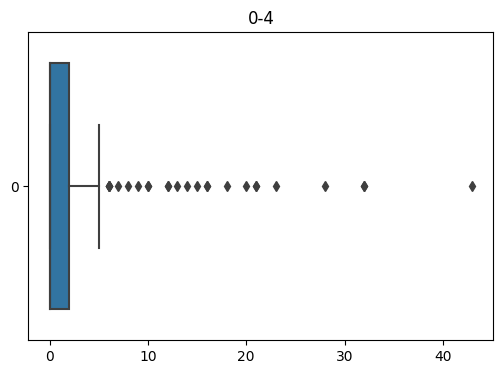

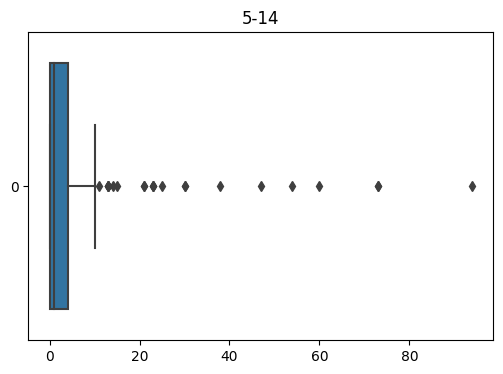

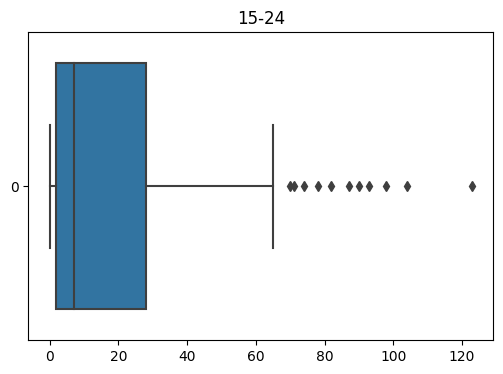

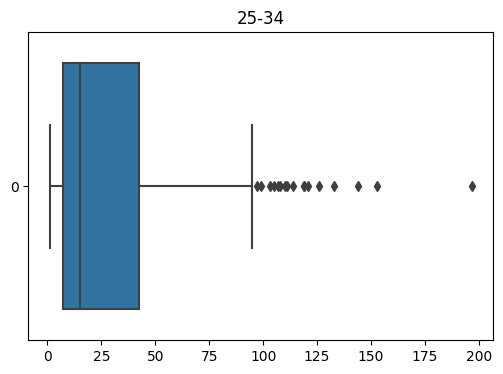

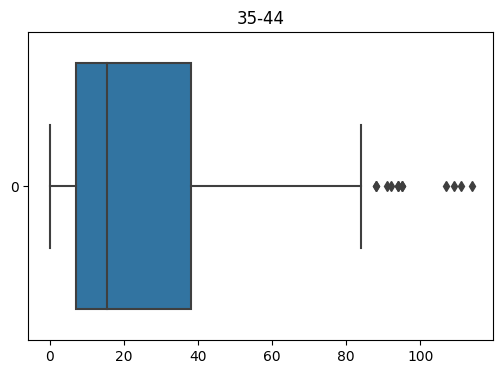

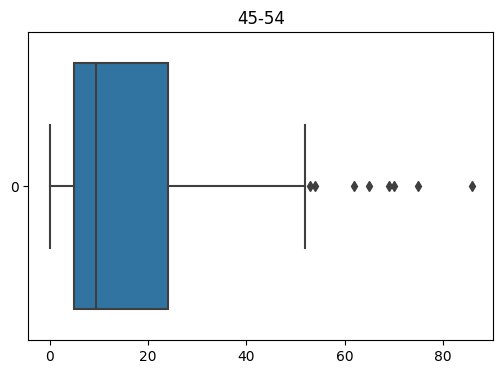

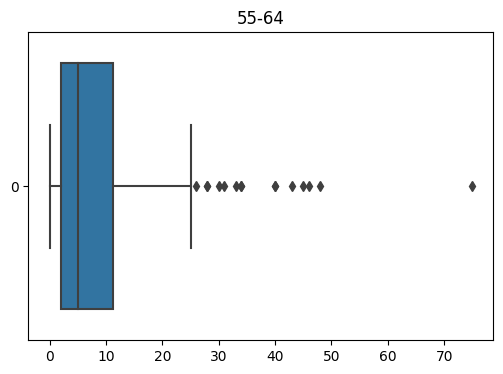

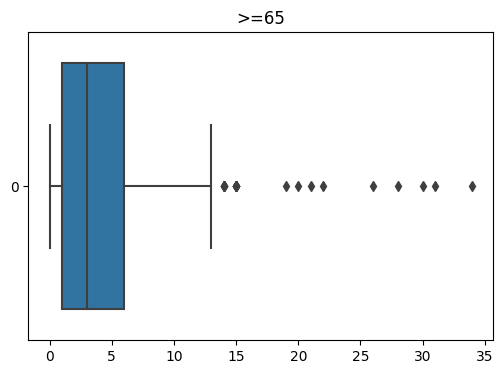

In [ ]:
for col in num_cols:
  fig = plt.figure(figsize=(6,4))
  sns.boxplot(block2c_2022[col],orient="h")
  plt.title(col)

In [ ]:
original_lgas_list = [
    "Birni – Gwari", "Chikun", "Giwa", "Igabi", "Ikara", "Jaba", "Jema'a",
    "Kachia", "Kaduna North", "Kaduna South", "Kagarko", "Kajuru", "Kaura",
    "Kauru", "Kubau", "Kudan", "Lere", "Makarfi", "Sabon – Gari", "Sanga",
    "Soba", "Zangon – Kataf", "Zaria"
]

In [ ]:
lgas_list = list(pd.unique(block2c_2022['LGA']))
lgas_list

['BIRIN GWARI',
 'CHIKUN',
 'GIWA',
 'IGABI',
 'IKARA',
 'JABA',
 'JEMAA',
 'KACHIA',
 'KADUNA NORTH',
 'KADUNA SOUTH',
 'KAGARKO',
 'KAJURU',
 'KAURA',
 'KAURU',
 'KUBAU',
 'KUDAN',
 'LERE',
 'MAKARFI',
 'SABON GARI',
 'SANGA',
 'SOBA',
 'ZANGON KATAF',
 'ZARIA']

In [ ]:
block2c_2022['LGA'] = block2c_2022['LGA'].apply(lambda x: original_lgas_list[lgas_list.index(x)])

### Data Flattening

Data is flattened with age columns for ease of analysis.

Total column is removed as it can be calculated by aggregation.

The new columns created are Age_Gr and TB_Cases.

In [ ]:
block2c_2022_flattened = pd.melt(
                                  block2c_2022,
                                  id_vars=['Year','Quarter','LGA','Sex'],
                                  value_vars=['0-4','5-14','15-24','25-34','35-44','45-54','55-64','>=65'],
                                  var_name = 'Age_Gr',
                                  value_name = 'TB_Cases'
                                )

In [ ]:
block2c_2022_flattened

,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
0,2022,1,Birni – Gwari,Male,0-4,0
1,2022,1,Birni – Gwari,Female,0-4,0
2,2022,2,Birni – Gwari,Male,0-4,0
3,2022,2,Birni – Gwari,Female,0-4,0
4,2022,3,Birni – Gwari,Male,0-4,0
...,...,...,...,...,...,...
1467,2022,2,Zaria,Female,>=65,22
1468,2022,3,Zaria,Male,>=65,30
1469,2022,3,Zaria,Female,>=65,8
1470,2022,4,Zaria,Male,>=65,6


## UNIVARIATE ANALYSIS

### Year

In [ ]:
block2c_2022_flattened['Year'].nunique()

1

In [ ]:
block2c_2022_flattened['Year'].value_counts()

2022    1472
Name: Year, dtype: int64

We have one year data of year 2022

### Quarter

In [ ]:
block2c_2022_flattened['Quarter'].nunique()

4

In [ ]:
block2c_2022_flattened['Quarter'].value_counts()

1    368
2    368
3    368
4    368
Name: Quarter, dtype: int64

The year is can be divided into four quarters.

### LGA

In [ ]:
block2c_2022_flattened['LGA'].nunique()

23

In [ ]:
block2c_2022_flattened['LGA'].value_counts()

Birni – Gwari     64
Kaura             64
Zangon – Kataf    64
Soba              64
Sanga             64
Sabon – Gari      64
Makarfi           64
Lere              64
Kudan             64
Kubau             64
Kauru             64
Kajuru            64
Chikun            64
Kagarko           64
Kaduna South      64
Kaduna North      64
Kachia            64
Jema'a            64
Jaba              64
Ikara             64
Igabi             64
Giwa              64
Zaria             64
Name: LGA, dtype: int64

The Katuna state have 23 Local Government Authorities (LGA).

### Age_Gr

In [ ]:
block2c_2022_flattened['Age_Gr'].nunique()

8

In [ ]:
block2c_2022_flattened['Age_Gr'].value_counts()

0-4      184
5-14     184
15-24    184
25-34    184
35-44    184
45-54    184
55-64    184
>=65     184
Name: Age_Gr, dtype: int64

we have equal samples of 8 different Age groups.

### TB_Cases

<Axes: xlabel='TB_Cases', ylabel='Count'>

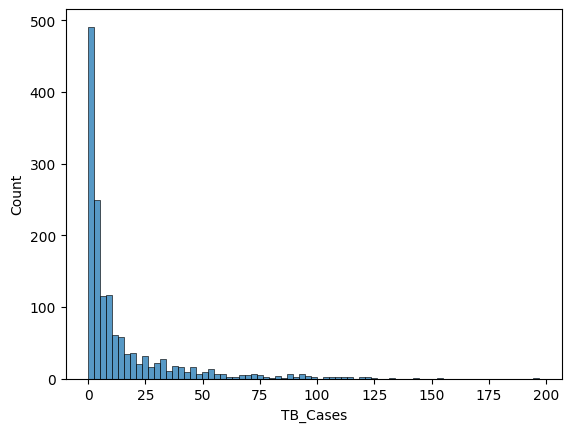

In [ ]:
sns.histplot(block2c_2022_flattened['TB_Cases'])

The graph is left skewed with case counts below 10 for most of the time.

## Bivariate_analysis

### Year-wise TB Cases

In [ ]:
Yearwise_TB_Cases = block2c_2022_flattened.groupby(['Year'])['TB_Cases'].sum().reset_index()

In [ ]:
Yearwise_TB_Cases.head()

,Year,TB_Cases
0,2022,21473


we have total of nearly 21.5K cases for year 2022 for block 2C.

### Quarter-wise TB Cases

In [ ]:
Quarterwise_TB_Cases = block2c_2022_flattened.groupby(['Quarter'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_TB_Cases.head()

,Quarter,TB_Cases
0,1,4296
1,2,4456
2,3,5772
3,4,6949


([<matplotlib.axis.XTick at 0x7b704a01a9b0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

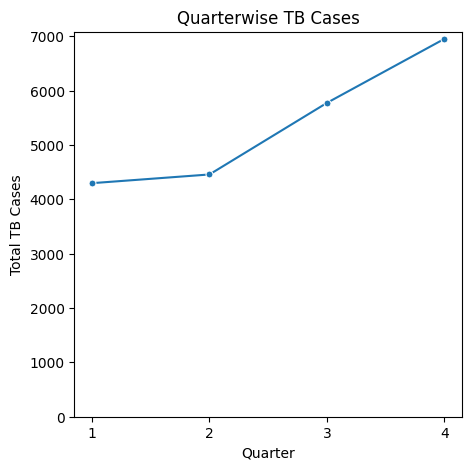

In [ ]:
fig = plt.figure(figsize=(5,5))

g = sns.lineplot(
    data = Quarterwise_TB_Cases,
    x = 'Quarter',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 5
)

g.set_ylim(bottom=0)
plt.title('Quarterwise TB Cases')
plt.xlabel('Quarter')
plt.ylabel('Total TB Cases')
plt.xticks([1,2,3,4],[1,2,3,4])

Trend is upwards and the rate increases from quarter 2.

### LGA-wise TB Cases

In [ ]:
LGAwise_TB_Cases = block2c_2022_flattened.groupby('LGA')['TB_Cases'].sum().reset_index()

In [ ]:
LGAwise_TB_Cases.head()

,LGA,TB_Cases
0,Birni – Gwari,478
1,Chikun,1395
2,Giwa,2088
3,Igabi,796
4,Ikara,178


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

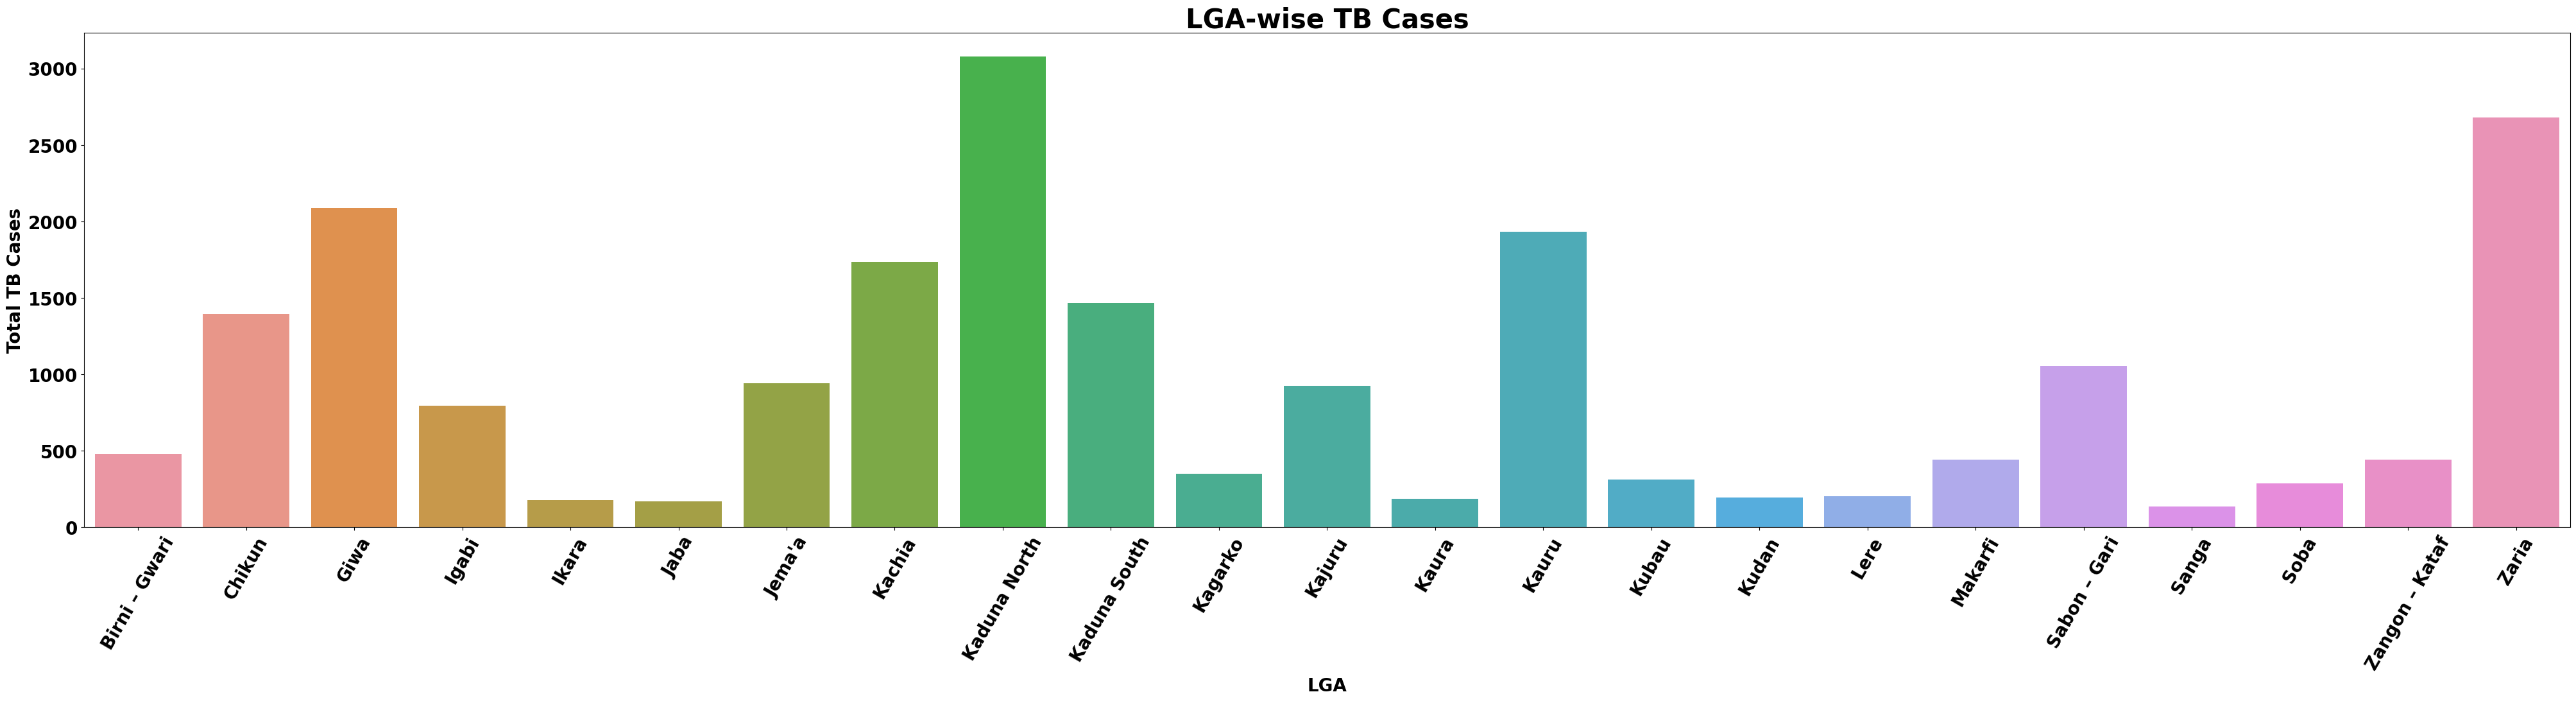

In [ ]:
fig = plt.figure(figsize=(50,10))

sns.barplot(
    data = LGAwise_TB_Cases,
    x = 'LGA',
    y = 'TB_Cases'
)

plt.title('LGA-wise TB Cases',fontsize= 30,fontweight='bold')
plt.xlabel('LGA',fontsize= 20,fontweight='bold')
plt.ylabel('Total TB Cases',fontsize= 20,fontweight='bold')
plt.xticks(fontsize= 20,fontweight='bold',rotation=60)
plt.yticks(fontsize= 20,fontweight='bold')

Kaduna North, Zaria and GWA are TOP 3 LGAs in terms of cases
registered.

Sanga,Jaba and Ikara are Bottom 3 LGAs in terms of cases registered.

### Age_Gr wise TB Cases

In [ ]:
AgeGrwise_TB_Cases = block2c_2022_flattened.groupby('Age_Gr')['TB_Cases'].sum().reset_index()

In [ ]:
AgeGrwise_TB_Cases

,Age_Gr,TB_Cases
0,0-4,518
1,15-24,3451
2,25-34,5892
3,35-44,4934
4,45-54,3077
5,5-14,1008
6,55-64,1683
7,>=65,910


Text(0, 0.5, 'Age Gr')

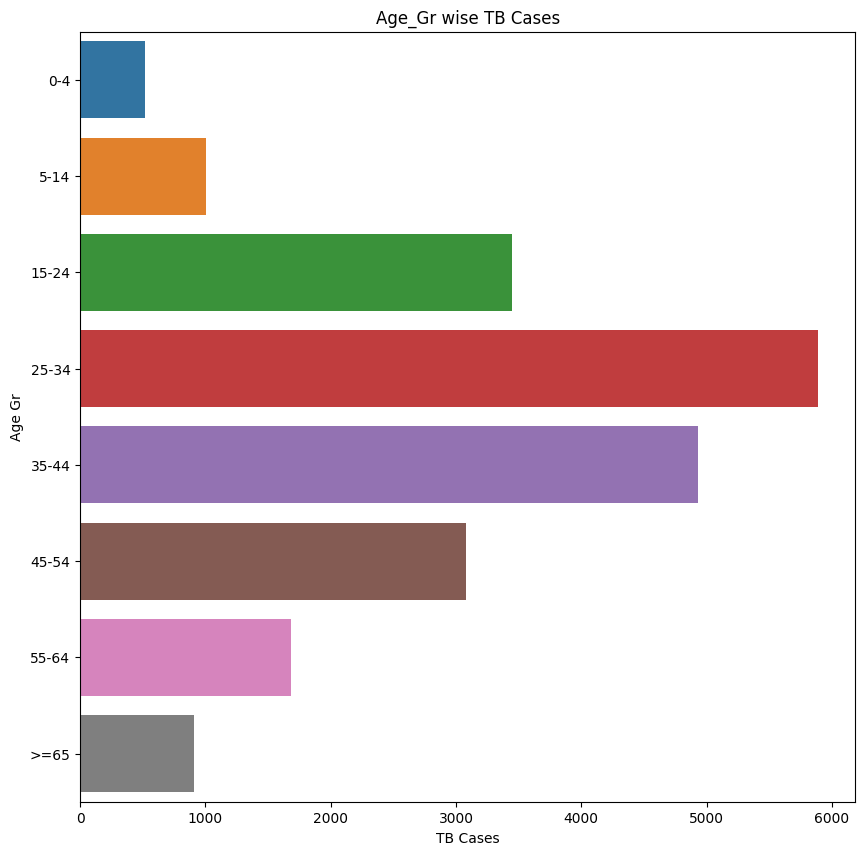

In [ ]:
plt.figure(figsize = (10,10))

sns.barplot(
    data = AgeGrwise_TB_Cases,
    x = 'TB_Cases',
    y = 'Age_Gr',
    orient = "h",
    order = ['0-4','5-14','15-24','25-34','35-44','45-54','55-64','>=65']
)

plt.title('Age_Gr wise TB Cases')
plt.xlabel('TB Cases')
plt.ylabel('Age Gr')

Age gr. 25-34 and 35-44 have most TB Cases.

## Multivariate Analysis

### Quarterwise trend of TB Cases In LGA

In [ ]:
Quarterwise_Trend_Over_LGA = block2c_2022_flattened.groupby(['LGA','Quarter'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_Trend_Over_LGA

,LGA,Quarter,TB_Cases
0,Birni – Gwari,1,120
1,Birni – Gwari,2,109
2,Birni – Gwari,3,103
3,Birni – Gwari,4,146
4,Chikun,1,319
...,...,...,...
87,Zangon – Kataf,4,153
88,Zaria,1,482
89,Zaria,2,628
90,Zaria,3,734


In [ ]:
LGAs = list(pd.unique(Quarterwise_Trend_Over_LGA['LGA']))

Text(0.5, 0.98, 'Quarterwise trend of TB Cases In Each LGA')

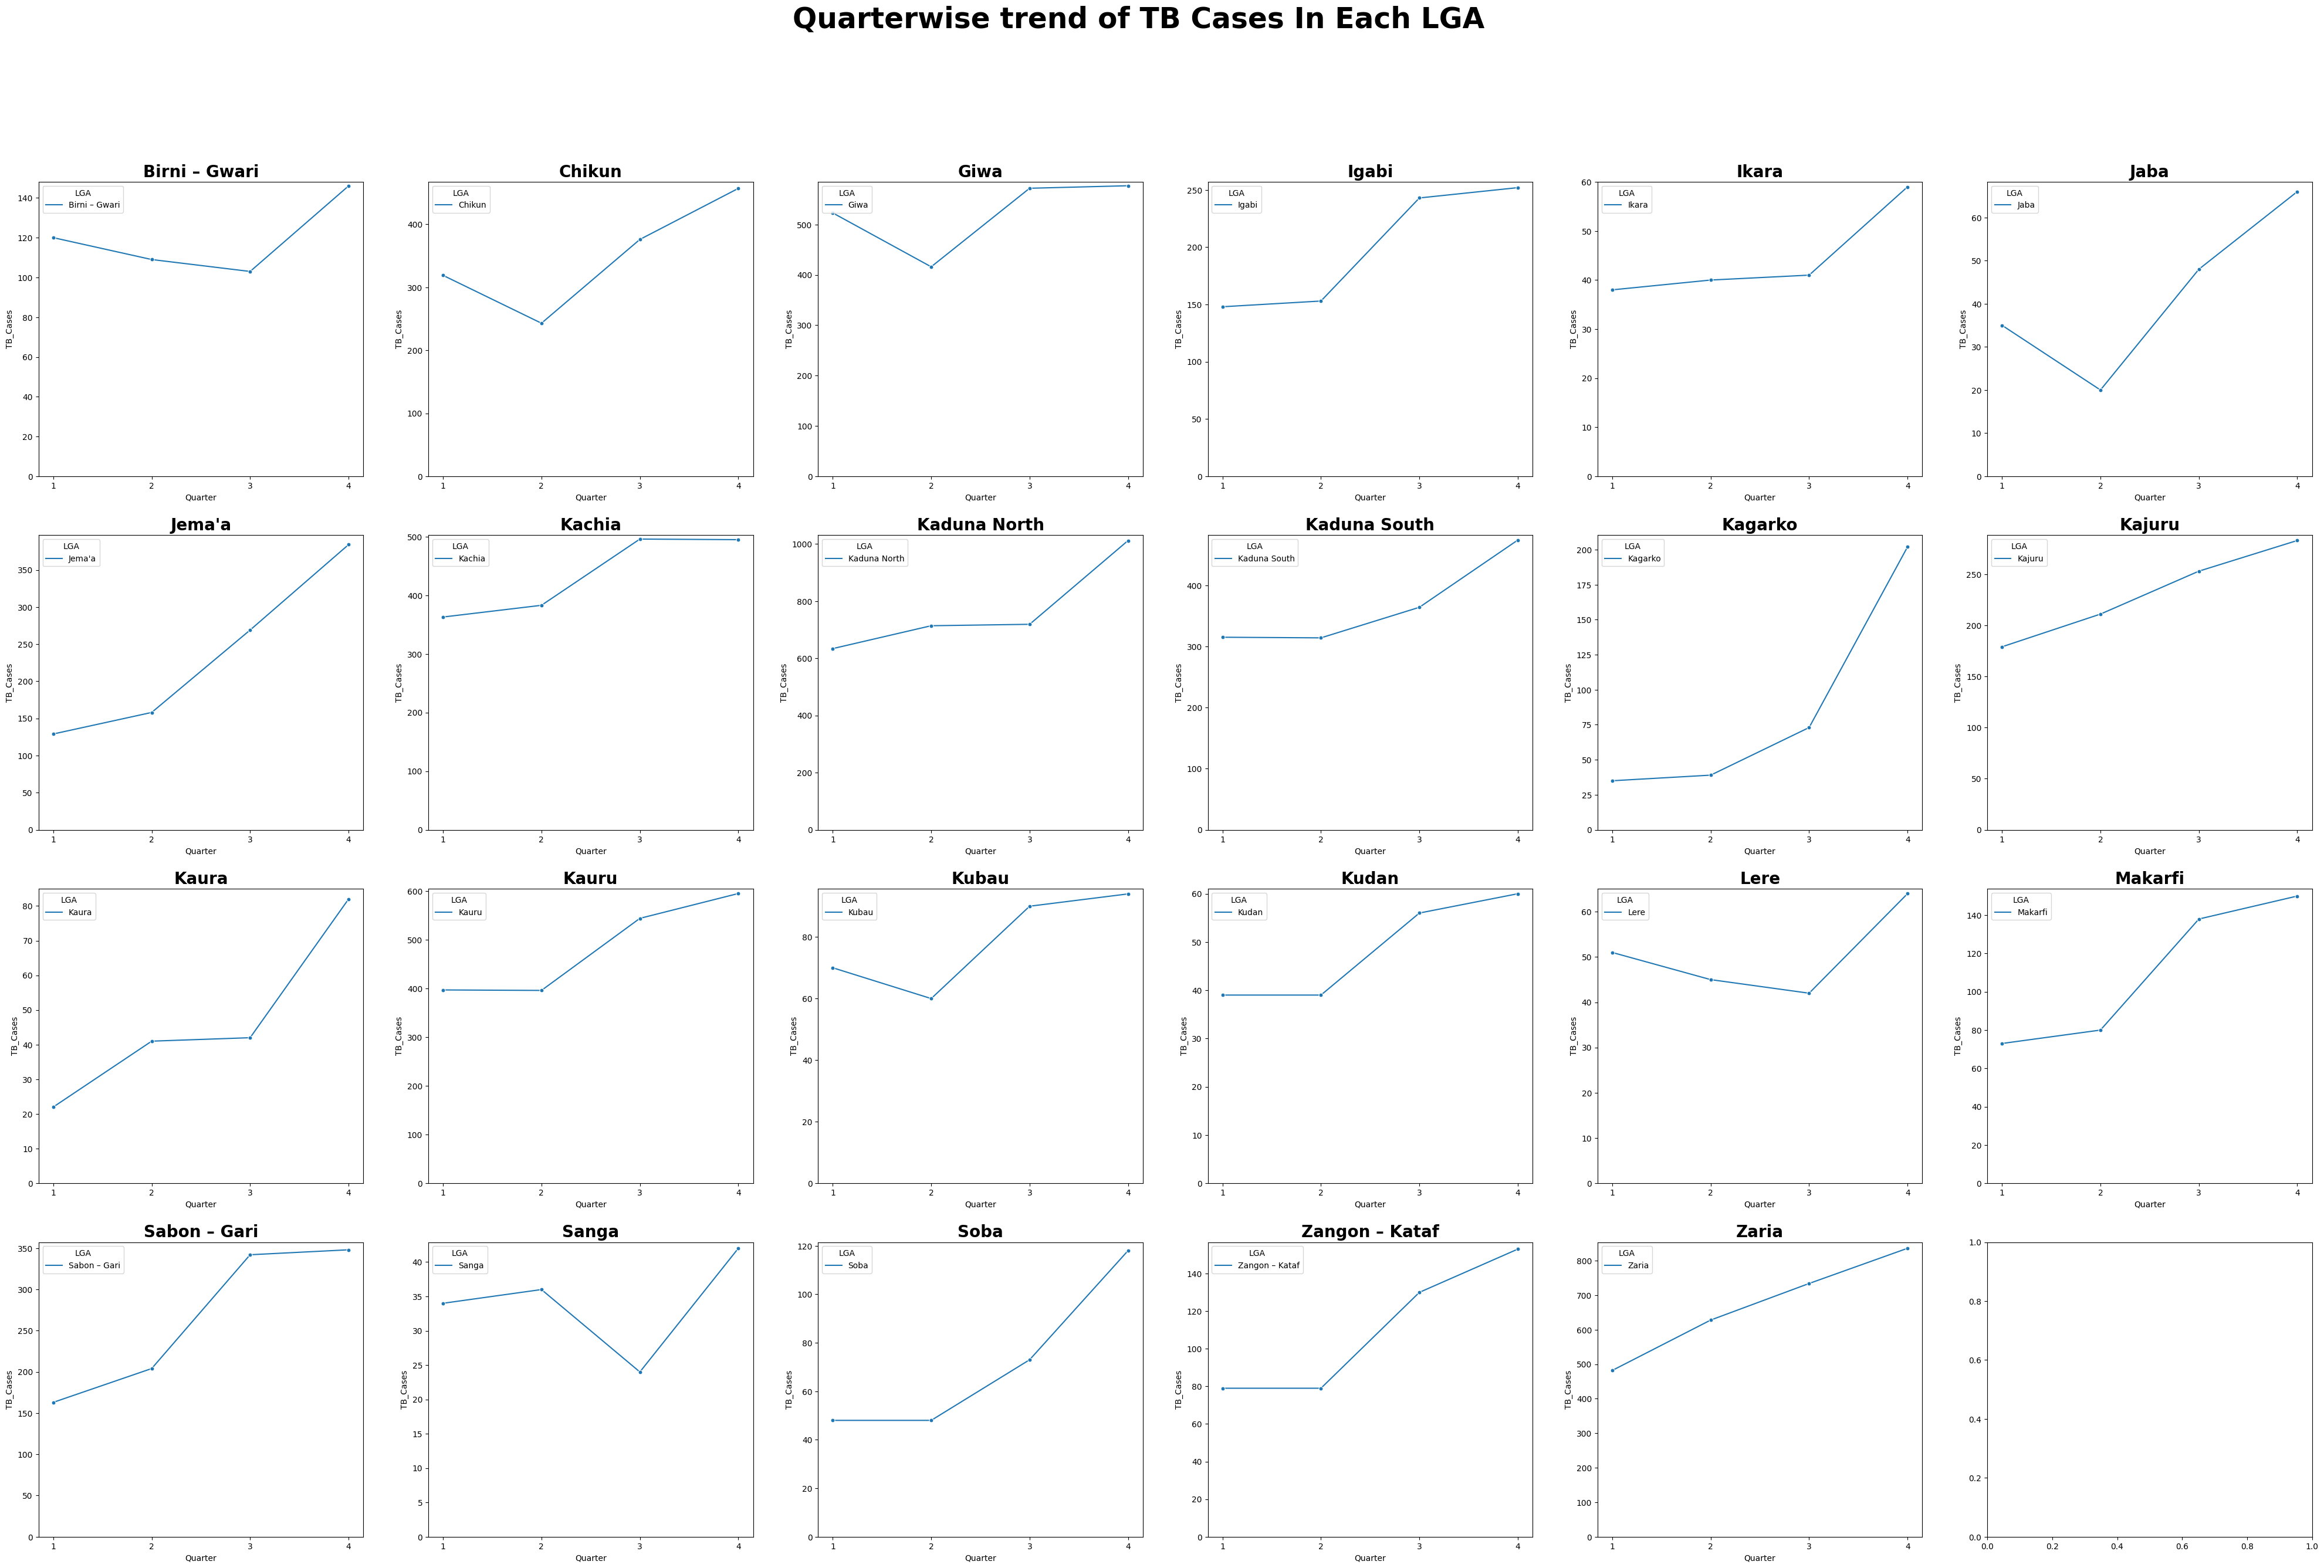

In [ ]:
fig,axes = plt.subplots(4,6,figsize=(50,30))

i=0
j=0

for lga in LGAs:
  sns.lineplot(
      ax = axes[i,j],
      data = Quarterwise_Trend_Over_LGA.loc[Quarterwise_Trend_Over_LGA['LGA']==lga],
      x = 'Quarter',
      y = 'TB_Cases',
      hue = 'LGA',
      marker = 'o',
      markersize=5
  )
  axes[i,j].set_title(lga, fontsize=20, fontweight='bold')
  axes[i,j].set_xticks([1,2,3,4],[1,2,3,4])
  axes[i,j].set_ylim(bottom=0)
  j = j+1
  if j==6:
    i = i+1
    j=0

plt.suptitle('Quarterwise trend of TB Cases In Each LGA', fontsize=35, fontweight='bold')


### Quarterwise Trend Of TB Cases For Each Age Group

In [ ]:
Quarterwise_Trend_Over_Age = block2c_2022_flattened.groupby(['Quarter','Age_Gr'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_Trend_Over_Age

,Quarter,Age_Gr,TB_Cases
0,1,0-4,56
1,1,15-24,707
2,1,25-34,1227
3,1,35-44,1009
4,1,45-54,636
5,1,5-14,117
6,1,55-64,366
7,1,>=65,178
8,2,0-4,65
9,2,15-24,753


([<matplotlib.axis.XTick at 0x7b7043a0b9d0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

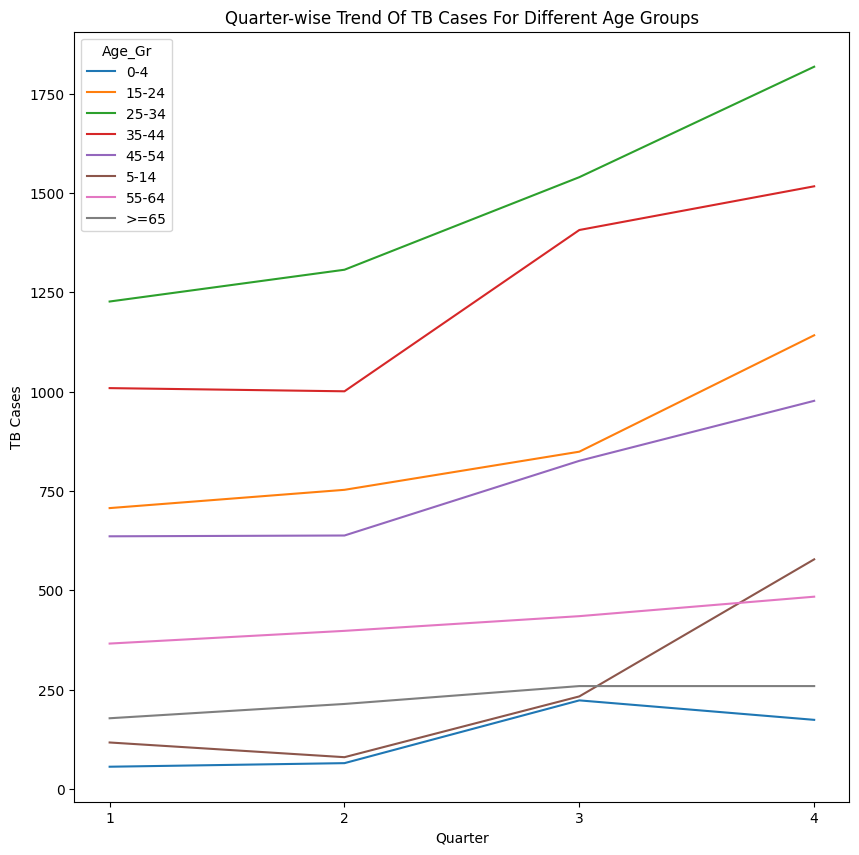

In [ ]:
plt.figure(figsize = (10,10))

sns.lineplot(
    data = Quarterwise_Trend_Over_Age,
    x = 'Quarter',
    y = 'TB_Cases',
    hue = 'Age_Gr'
)

plt.title('Quarter-wise Trend Of TB Cases For Different Age Groups')
plt.xlabel('Quarter')
plt.ylabel('TB Cases')
plt.xticks([1,2,3,4],[1,2,3,4])

### TB Cases for different Age Groups In Each LGA

In [ ]:
Agewise_TB_Cases_For_LGA = block2c_2022_flattened.groupby(['LGA','Age_Gr'])['TB_Cases'].sum().reset_index()

In [ ]:
Agewise_TB_Cases_For_LGA

,LGA,Age_Gr,TB_Cases
0,Birni – Gwari,0-4,3
1,Birni – Gwari,15-24,37
2,Birni – Gwari,25-34,85
3,Birni – Gwari,35-44,71
4,Birni – Gwari,45-54,91
...,...,...,...
179,Zaria,35-44,540
180,Zaria,45-54,314
181,Zaria,5-14,165
182,Zaria,55-64,196


In [ ]:
LGAs = list(pd.unique(Agewise_TB_Cases_For_LGA['LGA']))
LGAs

['Birni – Gwari',
 'Chikun',
 'Giwa',
 'Igabi',
 'Ikara',
 'Jaba',
 "Jema'a",
 'Kachia',
 'Kaduna North',
 'Kaduna South',
 'Kagarko',
 'Kajuru',
 'Kaura',
 'Kauru',
 'Kubau',
 'Kudan',
 'Lere',
 'Makarfi',
 'Sabon – Gari',
 'Sanga',
 'Soba',
 'Zangon – Kataf',
 'Zaria']

Text(0.5, 0.98, 'Agewise TB Cases For Each LGA')

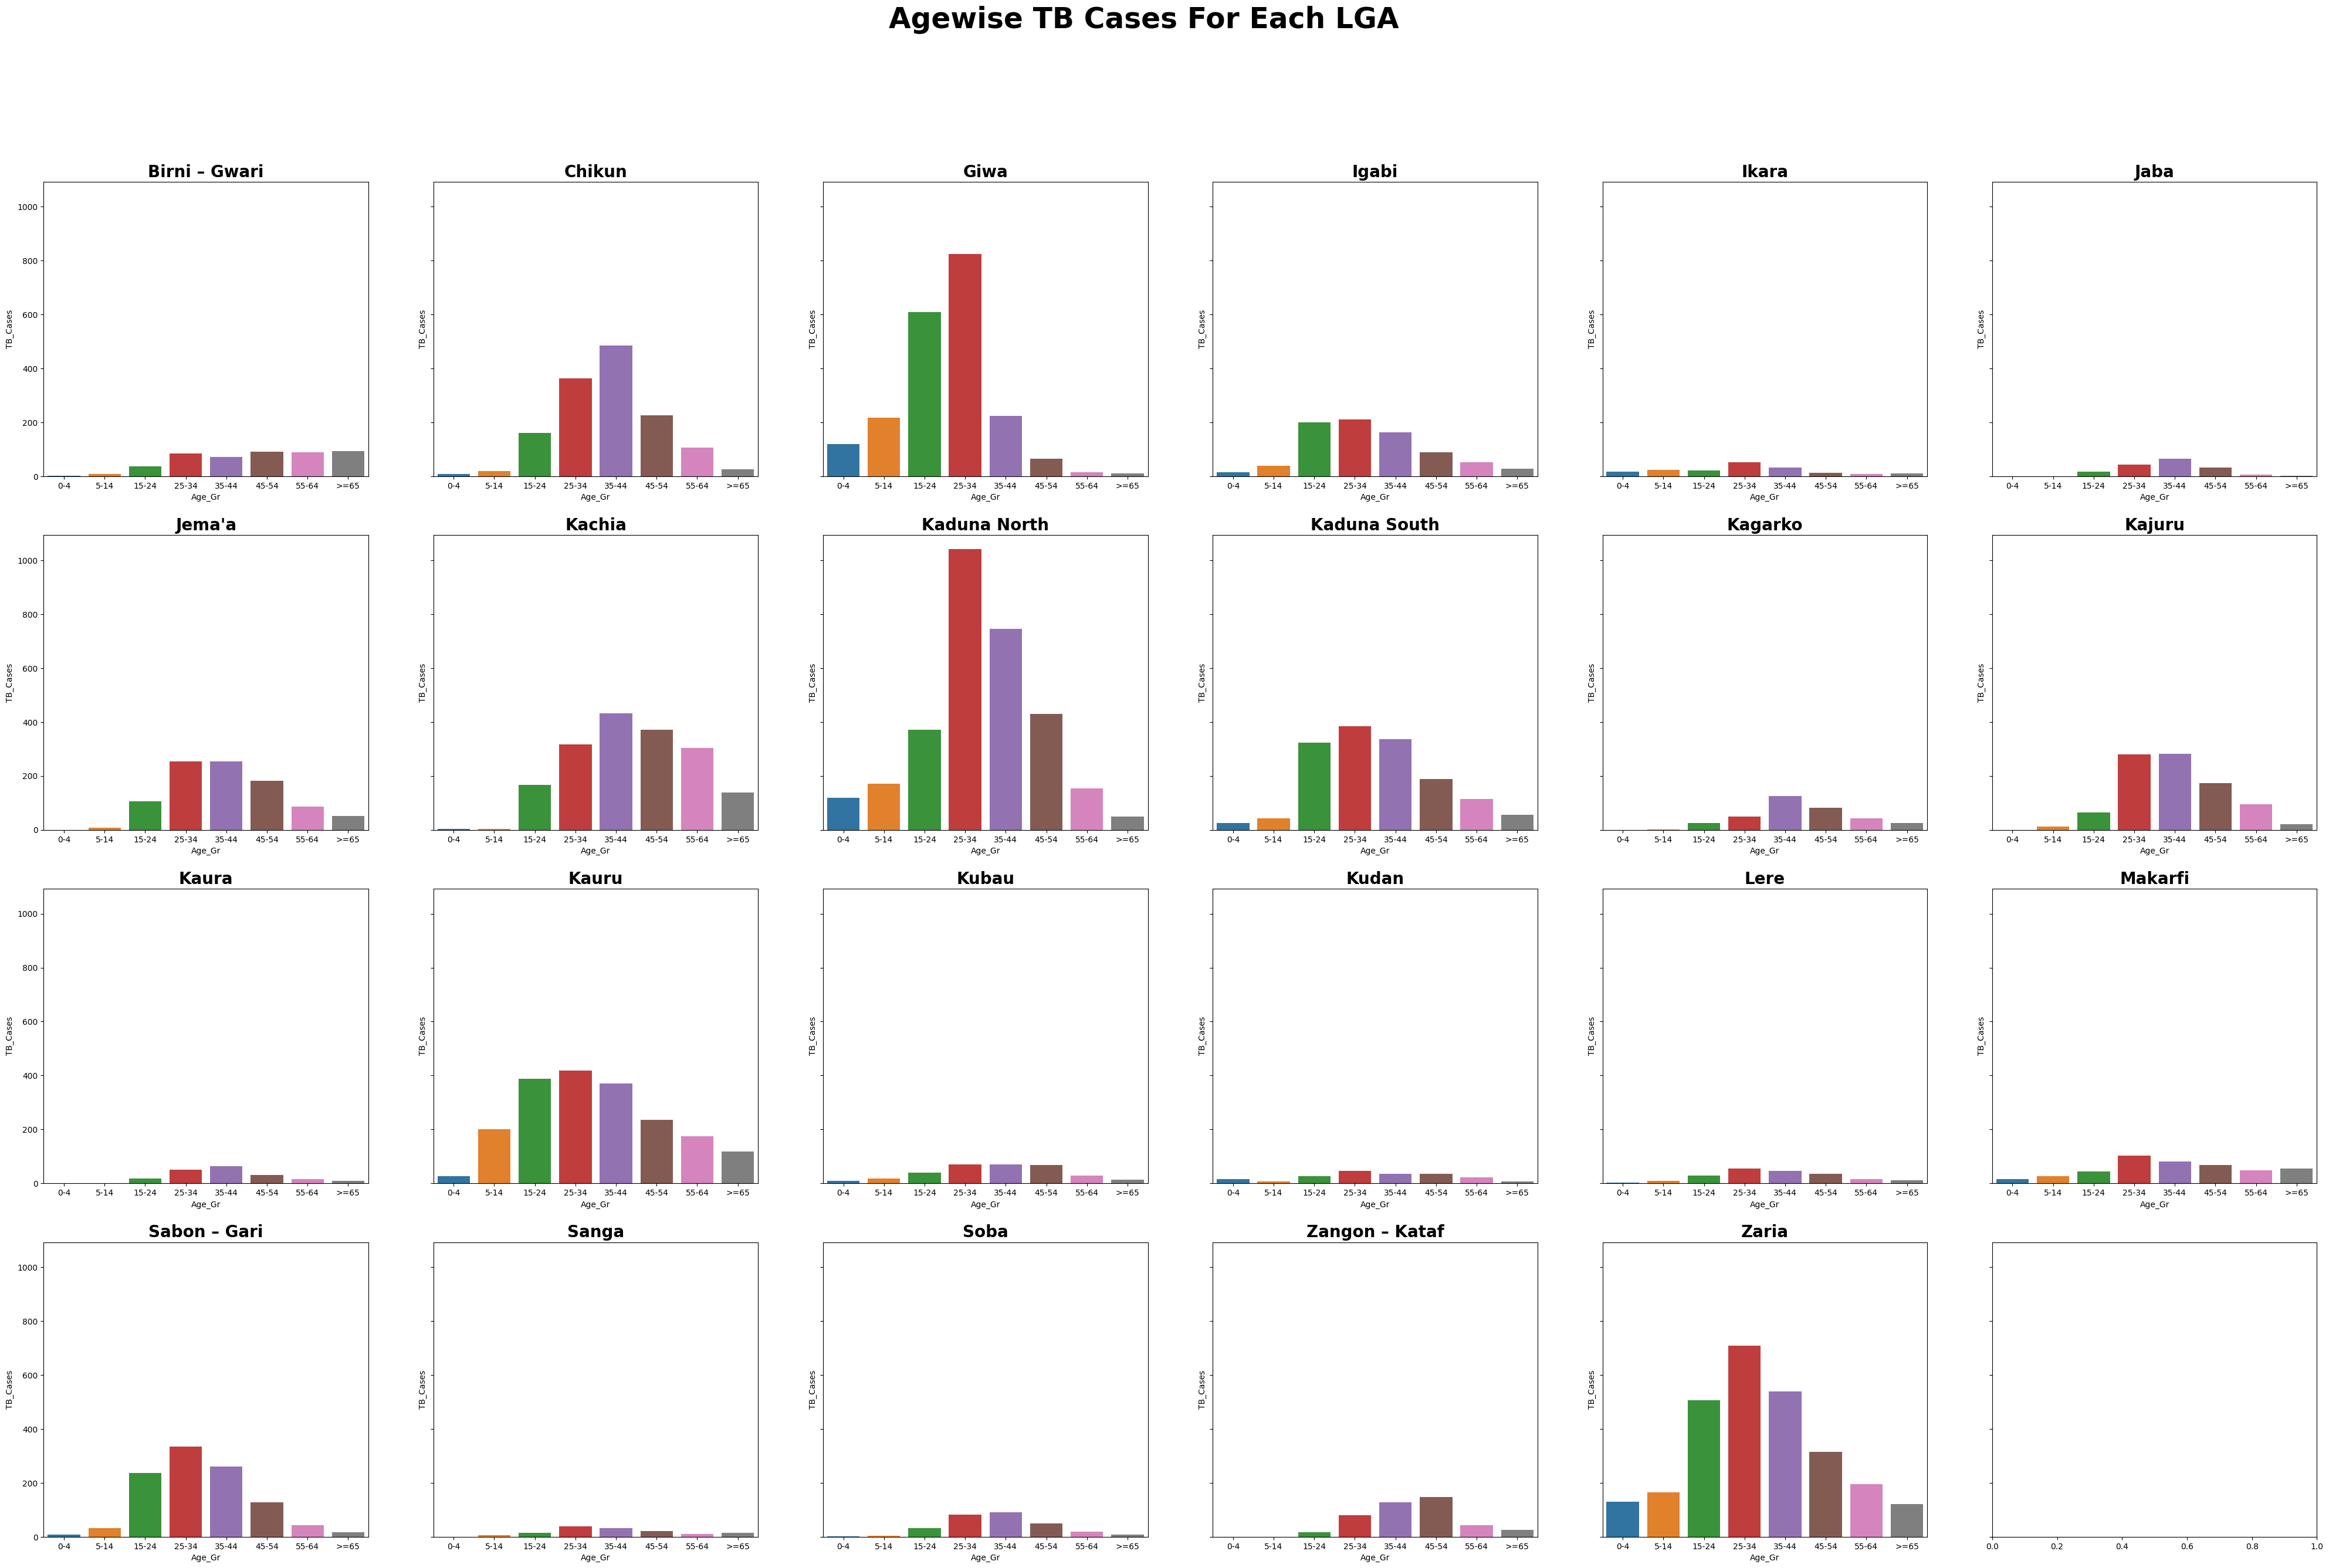

In [ ]:
fig, axes = plt.subplots(4, 6, figsize=(50,30),sharey=True)
i=0
j=0
for lga in LGAs:
  sns.barplot(
      ax = axes[i,j],
      data = Agewise_TB_Cases_For_LGA.loc[Agewise_TB_Cases_For_LGA['LGA'] == lga],
      x = 'Age_Gr',
      y = 'TB_Cases',
      order = ['0-4','5-14','15-24','25-34','35-44','45-54','55-64','>=65'],
      # hue_order = ['Blue','Orange','Green','Red','Purple','Brown','Pink','Sky Blue']
  )
  axes[i,j].set_title(lga, fontsize=20, fontweight='bold')
  j = j+1
  if j == 6:
    i = i+1
    j=0

fig.suptitle('Agewise TB Cases For Each LGA', fontsize=35, fontweight='bold')